## Introduction to Exploratory Data Analysis
The first step is to impoty the necessary libraries and packages as below.

In [150]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from scipy.stats import iqr

The data used is the IT Survey Data In the European Union for the 2020 survey

In [151]:
# Importing the dataset used
data = pd.read_csv('C:/Users/user/Desktop/Lux Academy/IT Salary Survey EU  2020.csv')

 #### Exploring the dataset
 We now begin our exploratory data analysis by inspecting the dataset

In [152]:
## Displaying the rows and columns in the dataset
print(data.shape)

(1253, 23)


The data has 1253 rows ama 23 columns

In [153]:
# Displaying the top rows
data.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [154]:
# Displaying the both rows
data.tail()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",...,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,...,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",...,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",...,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0
1252,19/01/2021 12:01:11,26.0,Male,Berlin,DevOps,2,2,Middle,yaml,"Python, AWS, Kubernetes, Docker, terraform, an...",...,0,30,Full-time employee,Unlimited contract,English,51-100,Startup,No,30.0,600


In [155]:
# Displaying the columns in the datset
data.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [156]:
# Rename the column names for easy identification of variables
data.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Germany Experience","Seniority level","Tech program language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]
data.columns = data.columns.str.replace(' ', '_')
# Lets view if the column names changed
data.columns

Index(['Year', 'Age', 'Gender', 'City', 'Position', 'Years_of_experience',
       'Germany_Experience', 'Seniority_level', 'Tech_program_language',
       'Other_Language', 'Yearly_salary', 'Yearly_bonus_and_stocks',
       'Salary_one_year_ago', 'Bonus_and_stocks_last_year', 'Vacation_days',
       'Employment_status', 'Сontract_duration', 'Language', 'Company_size',
       'Company_type', 'Job_loss_COVID', 'Kurzarbeit', 'Monetary_Support'],
      dtype='object')

In [157]:
# The data types of the columns
data.dtypes

Year                           object
Age                           float64
Gender                         object
City                           object
Position                       object
Years_of_experience            object
Germany_Experience             object
Seniority_level                object
Tech_program_language          object
Other_Language                 object
Yearly_salary                 float64
Yearly_bonus_and_stocks        object
Salary_one_year_ago           float64
Bonus_and_stocks_last_year     object
Vacation_days                  object
Employment_status              object
Сontract_duration              object
Language                       object
Company_size                   object
Company_type                   object
Job_loss_COVID                 object
Kurzarbeit                    float64
Monetary_Support               object
dtype: object

In [158]:
# Dropping the variables that we don't need for the analysis
del data['Germany_Experience']
del data['Other_Language']
del data['Employment_status']
del data['Сontract_duration']

In [112]:
# Check for missing values
data.isnull().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Tech_program_language         127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

In [159]:
# Drpping missing values
data = data.dropna(subset=['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 

In [160]:
# Dropping duplicates
data = data.drop_duplicates()

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        860 non-null    object 
 1   Age                         860 non-null    float64
 2   Gender                      860 non-null    object 
 3   City                        860 non-null    object 
 4   Position                    860 non-null    object 
 5   Years_of_experience         860 non-null    object 
 6   Seniority_level             860 non-null    object 
 7   Tech_program_language       790 non-null    object 
 8   Yearly_salary               860 non-null    float64
 9   Yearly_bonus_and_stocks     625 non-null    object 
 10  Salary_one_year_ago         860 non-null    float64
 11  Bonus_and_stocks_last_year  584 non-null    object 
 12  Vacation_days               848 non-null    object 
 13  Language                    860 no

In [162]:
# Lets check the shape of the dataset after removing missing values and other columns
data.shape

(860, 19)

In [163]:
# Checking if there are any other missing values
data.isnull().sum()

Year                            0
Age                             0
Gender                          0
City                            0
Position                        0
Years_of_experience             0
Seniority_level                 0
Tech_program_language          70
Yearly_salary                   0
Yearly_bonus_and_stocks       235
Salary_one_year_ago             0
Bonus_and_stocks_last_year    276
Vacation_days                  12
Language                        0
Company_size                    0
Company_type                    2
Job_loss_COVID                  2
Kurzarbeit                    575
Monetary_Support              511
dtype: int64

#### Other necessary data cleaning processes

In [164]:
# Changing the datetime format variable into date
data['Year'] = pd.to_datetime(data['Year']).dt.year

In [165]:
print(data.Year)

0       2020
1       2020
2       2020
4       2020
5       2020
        ... 
1248    2021
1249    2021
1250    2021
1251    2021
1252    2021
Name: Year, Length: 860, dtype: int64


Notice that the data include data for 2021, so we need to filter out the unnecessary data

In [166]:
# Filter out data for 2021 to only include data for 2020
data_filtered = data[data['Year'] == 2020]
print(data_filtered.Year)

0       2020
1       2020
2       2020
4       2020
5       2020
        ... 
1211    2020
1212    2020
1213    2020
1214    2020
1215    2020
Name: Year, Length: 833, dtype: int64


In [167]:
# Cleaning the Position Variable
data_filtered['Position'] = data_filtered['Position'].str.title().str.strip()


C:\Users\user\AppData\Local\Temp\ipykernel_17856\1374932834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Position'] = data_filtered['Position'].str.title().str.strip()


In [168]:
# Cleaning Seniority level
data_filtered['Seniority_level'] = data_filtered['Seniority_level'].str.title().str.strip()
data_filtered=data_filtered.replace({'Seniority_level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior',
                                                                       'Intern':'Junior','Working Student':'Junior','C-Level':'Senior',
                                                                       'No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior',
                                                                       'Entry Level':'Junior'}})

C:\Users\user\AppData\Local\Temp\ipykernel_17856\267509283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Seniority_level'] = data_filtered['Seniority_level'].str.title().str.strip()


In [169]:
# Cleaning Years of Experience
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].astype(str)

data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r',', '.',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'6 \(not as a data scientist. but as a lab scientist\)',
                                                                                                    '6',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'15\. thereof 8 as CTO','15',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'1 \(as QA Engineer\) / 11 in total','11',regex=True)
data_filtered['Years_of_experience']=data_filtered['Years_of_experience'].str.replace(r'less than year','1',regex=True)         

data_filtered['Years_of_experience'] = pd.to_numeric(data_filtered['Years_of_experience'])

In [170]:
# Checking the shape of the filtered dataset
data_filtered.shape

(833, 19)

In [171]:
# Cleaning tech language
data_filtered['Tech_program_language'] = data_filtered['Tech_program_language'].str.title().str.strip()

In [172]:
# Removing outlier salaries
data_filtered = data_filtered.drop(data_filtered[data_filtered.Yearly_salary > 500000].index)

In [173]:
# Descriptive analysis of the variables
data_filtered.describe().round()

,Year,Age,Years_of_experience,Yearly_salary,Salary_one_year_ago,Kurzarbeit
count,831.0,831.0,831.0,831.0,831.0,274.0
mean,2020.0,33.0,9.0,72561.0,66991.0,13.0
std,0.0,5.0,5.0,22409.0,31836.0,16.0
min,2020.0,22.0,0.0,12000.0,11000.0,0.0
25%,2020.0,29.0,5.0,60000.0,55000.0,0.0
50%,2020.0,32.0,9.0,70000.0,65000.0,0.0
75%,2020.0,36.0,12.0,80000.0,75000.0,30.0
max,2020.0,66.0,40.0,250000.0,760000.0,40.0


## Exploratory Analysis

### Age Distribution

A histogram of the age is plotted as below.

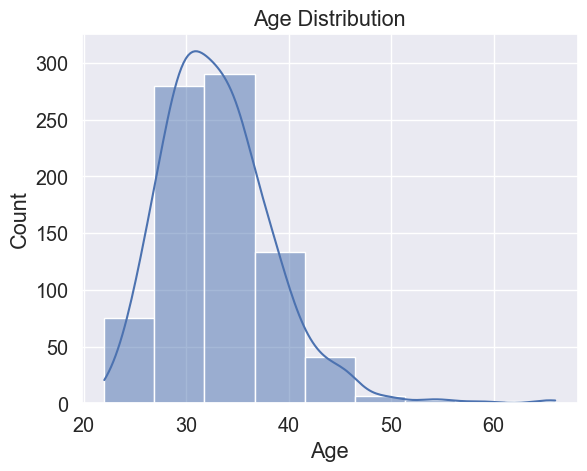

In [174]:
sns.set(font_scale=1.3)
plot = sns.histplot(data_filtered.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

In [175]:
# Descriptive Statistics
print('Descriptive Statistics of Age Variable')
data_filtered['Age'].describe().round()

Descriptive Statistics of Age Variable


count    831.0
mean      33.0
std        5.0
min       22.0
25%       29.0
50%       32.0
75%       36.0
max       66.0
Name: Age, dtype: float64

### Experience Vs Seniority

In [176]:
level_agg = data_filtered.groupby('Seniority_level').agg(Median_ye=('Years_of_experience', 'median'),
                                                                IQR=('Years_of_experience', iqr)).reset_index()
level_agg.drop([2], axis=0, inplace=True)


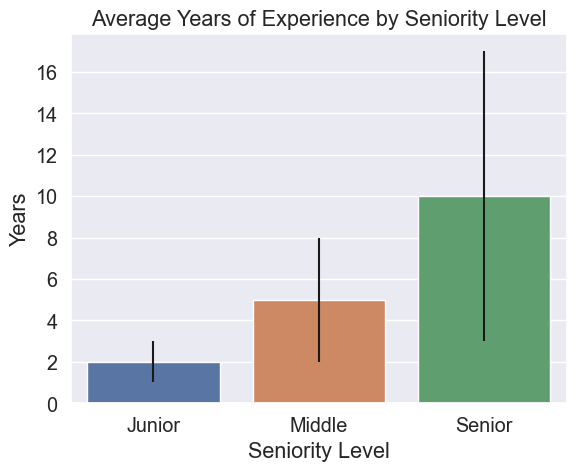

,Seniority_level,Median_ye,IQR
0,Junior,2.0,1.0
1,Middle,5.0,3.0
3,Senior,10.0,7.0


In [180]:
iqr=level_agg["IQR"]
sns.barplot(data =level_agg,
            x="Seniority_level",
            y="Median_ye",
            yerr=iqr)

plt.title('Average Years of Experience by Seniority Level')
plt.ylabel('Years')
plt.xlabel('Seniority Level')
plt.show()

level_agg

### Salary Analysis

#### Descriptive statistics

In [181]:
data_filtered[['Yearly_salary']].describe().round()

,Yearly_salary
count,831.0
mean,72561.0
std,22409.0
min,12000.0
25%,60000.0
50%,70000.0
75%,80000.0
max,250000.0
